Saving Customers.csv to Customers (3).csv
Saving Products.csv to Products (3).csv
Saving Transactions.csv to Transactions (3).csv
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112     

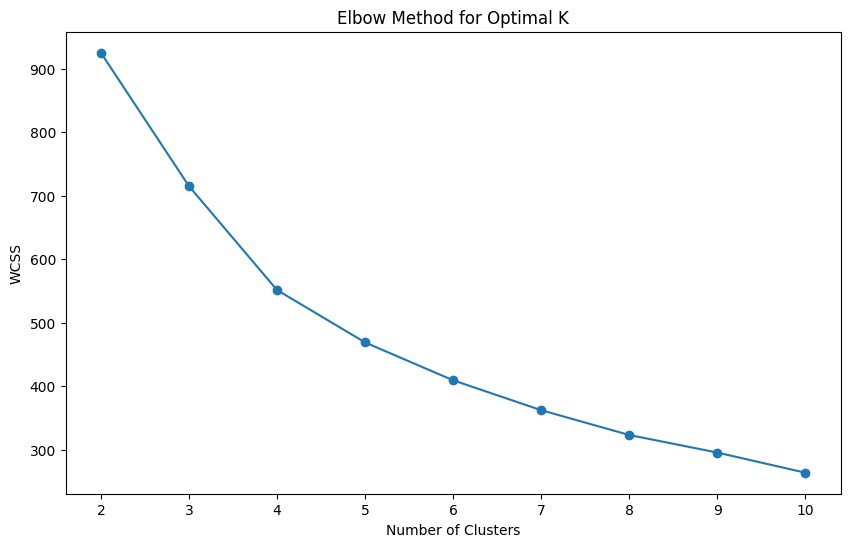

Davies-Bouldin Index: 1.173652846363465


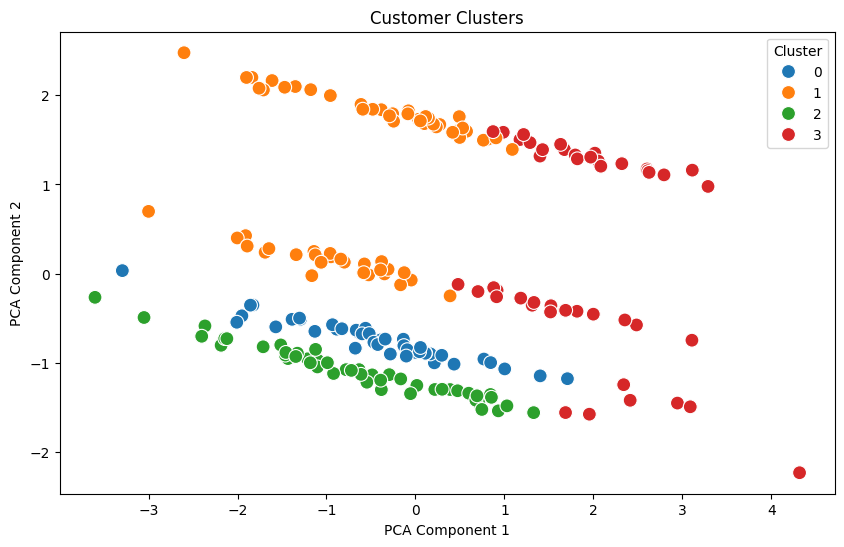

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd
uploaded = files.upload()
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')
print(customers.head())
print(products.head())
print(transactions.head())
merged = transactions.merge(customers, on='CustomerID', how='inner').merge(products, on='ProductID', how='inner')
print(merged.head())
print(merged.columns)
if 'TotalValue' in merged.columns and 'Quantity' in merged.columns:
    merged['Price'] = merged['TotalValue'] / merged['Quantity']
customer_features = merged.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price': 'mean',
    'Region': 'first'
}).reset_index()

customer_features = pd.get_dummies(customer_features, columns=['Region'], drop_first=True)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.iloc[:, 1:])
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)
db_index = davies_bouldin_score(scaled_features, customer_features['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=pca_features[:, 0],
    y=pca_features[:, 1],
    hue=customer_features['Cluster'],
    palette='tab10',
    s=100
)
plt.title('Customer Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

customer_features[['CustomerID', 'Cluster']].to_csv('Keesari_Saiakhil_Clustering_Results.csv', index=False)
from google.colab import files
files.download('Keesari_Saiakhil_Clustering_Results.csv')
